In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np


<function __main__.poly_visualize>

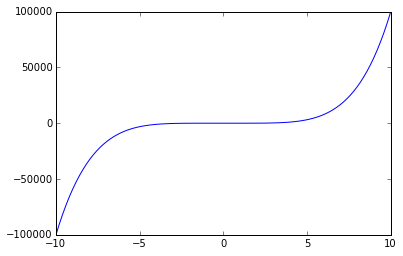

In [2]:
# how to use numpy polynomials
# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

def poly_visualize(root1,root2,root3,root4,root5):
    poly1 = np_poly.Polynomial.fromroots((root1,root2,root3,root4,root5))
    x, y = poly1.linspace(domain=(-10,10))
    plt.plot(x, y)

interact(poly_visualize, root1=(-10,10), root2=(-10,10), root3=(-10,10), root4=(-10,10), root5=(-10,10))

In [3]:
def lm_inner(a, b):
    return (a.transpose()*b)[0,0]

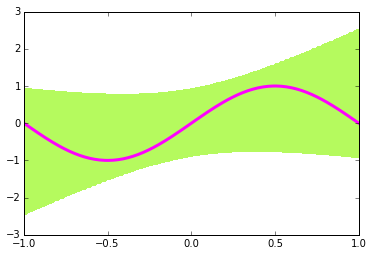

In [4]:
# example 4.1
# target function: sine
# N = 2
# with and w/o weight decay
N, T = 2, 200
N_plot = 200
x_plot = np.linspace(-1,1,N_plot).reshape((N_plot,1))
xx_plot = np.matrix(np.hstack([np.ones_like(x_plot), x_plot])).reshape(N_plot, 2)
all_ys = np.matrix(np.zeros((N_plot, T))).reshape(N_plot, T)
for t in range(T):
    # sample the N points from sine
    x = np.matrix(np.random.rand(N)).reshape((N,1))*2-1
    sin_x = np.matrix([math.sin(math.pi*xx) for xx in x]).reshape((N,1))
    
    # form the homogenous coordinates
    X = np.hstack([np.ones_like(x),x])
    # could have done w/ the inverse instead, but what the heck
    w = (X.transpose()*X)**-1 * X.transpose() * sin_x
    
    # show the line
    w_plot = np.matrix([lm_inner(w,xx_plot[ix,:].transpose()) for ix in range(N_plot)]).reshape((N_plot,1))
    all_ys[:,t] = w_plot
    #plt.plot(xx_plot[:,1], w_plot, color=('#B5FA5E'))

w_mean = np.mean(all_ys, 1)
w_std  = np.std(all_ys,  1)
for ix in range(N_plot):
    x_val = xx_plot[ix, 1]
    y_mean, y_std = w_mean[ix,0], w_std[ix,0]
    # mpl.lines.Line2D
    plt.plot([x_val,x_val], [y_mean-y_std, y_mean+y_std], color='#B5FA5E', linewidth=2)

# show the sine man
sin_x_plot = np.matrix([math.sin(math.pi*xx) for xx in x_plot]).reshape(N_plot,1)
plt.plot(x_plot, sin_x_plot, color='magenta', linewidth=3)
plt.axis((-1,1,-3,3))

plt.show()

In [5]:
a = np.matrix(np.zeros((5,3)))
# print(a)
a[:,1] = np.matrix(np.ones((5,1)))
# print(a)
a = np.matrix(np.random.rand(5,3))
# print(a)
# print(np.mean(a,1))
# print(np.var(a,1))
np.std(a,1)

matrix([[ 0.14929003],
        [ 0.30404971],
        [ 0.09008981],
        [ 0.29838757],
        [ 0.15168566]])

In [6]:
# printing polynomials

def leg_term(ix, coeff):
    if coeff==0:
        return None
    if ix==0:
        return '{0}'.format(coeff)
    
    str_coeff = '{0}*'.format(coeff) if coeff!=1.0 else ''
    if ix==0:
        str_x = ''
    elif ix==1.0:
        str_x = 'x'
    else:
        str_x = 'x^{0}'.format(ix)
        
    return '{0}{1}'.format(str_coeff,str_x)

def poly_print(b_poly):
    poly = [leg_term(ix,a) for (ix,a) in enumerate(b_poly.coef)]
#     poly2 = list(filter(lambda x: x is not None, poly))
#     poly2 = [x for x in poly if x is not None]
    poly2 = filter(None, poly)
    print(' + '.join(poly2))
    
def leg_print(degree):
    b = np_poly.legendre.Legendre.basis(degree)
    b_poly = b.convert(kind=np_poly.Polynomial)
    poly_print(b_poly)
    

degree = 2
leg_print(degree)


-0.5 + 1.5*x^2


-0.5 + 1.5*x^2


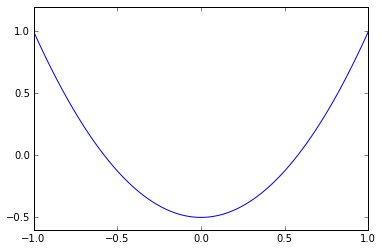

In [7]:
## legendre polynomials

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

def show_legendre(degree):
    leg_print(degree)
    b = np_poly.legendre.Legendre.basis(degree)
    x, y = b.linspace()
    plt.plot(x,y)
    plt.show()
    
interact(show_legendre, degree=(1,10))
